# 长沙二手房数据分析
## 1.数据爬取，来源链家3000条

In [16]:
import requests
from lxml import etree
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18363'}
url_list=[]
nd=[]
for i in range(1,101):
    urls='https://cs.lianjia.com/ershoufang/pg%s'
    page_text=requests.get(urls%i,headers=headers).text
    tree=etree.HTML(page_text)
    list1=tree.xpath('//*[@id="content"]/div[1]/div[6]/div/@data-houseid')
    lists=['https://cs.lianjia.com/ershoufang/{}.html'.format(item) for item in list1]
    print(i)
    url_list=url_list+lists
for i in range(0,3000):
    url=url_list[i]
    page_text=requests.get(url,headers=headers).text
    tree=etree.HTML(page_text)
    area_list=tree.xpath('/html/body/div[5]/div[2]/div[5]/div[2]/span[2]/a[1]/text()')
    if len(area_list) == 0:
        area_list=['数据缺失']
    Locations_list=tree.xpath('/html/body/div[5]/div[2]/div[5]/div[2]/span[2]/a[2]/text()')
    if len(Locations_list) == 0:
        Locations_list==['数据缺失']
    Names_list=tree.xpath('/html/body/div[5]/div[2]/div[5]/div[1]/a[1]/text()')
    if len(Names_list) == 0:
        Names_list==['数据缺失']
    Location_ditance_list=tree.xpath('/html/body/div[5]/div[2]/div[5]/div[2]/span[2]/text()[2]')
    if len(Location_ditance_list) ==0:
        Location_ditance_list=['数据缺失']
    House_door_model_list=tree.xpath('//*[@id="introduction"]/div/div/div[1]/div[2]/ul/li[1]/text()')
    if len(House_door_model_list) == 0:
        House_door_model_list==['数据缺失']
    House_area_of_list=tree.xpath('//*[@id="introduction"]/div/div/div[1]/div[2]/ul/li[5]/text()')
    if len(House_area_of_list) ==0:
        House_area_of_list==['数据缺失']
    Direction_list=tree.xpath('//*[@id="introduction"]/div/div/div[1]/div[2]/ul/li[7]/text()')
    if len(Direction_list) ==0:
        Direction_list==['数据缺失']
    Elevator_list=tree.xpath('//*[@id="introduction"]/div/div/div[1]/div[2]/ul/li[11]/text()')
    if len(Elevator_list) == 0:
        Elevator_list==['数据缺失']
    Floor_list=tree.xpath('//*[@id="introduction"]/div/div/div[1]/div[2]/ul/li[2]/text()')
    if len(Floor_list) == 0:
        Floor_list==['数据缺失']
    For_time_list=tree.xpath('//*[@id="introduction"]/div/div/div[2]/div[2]/ul/li[1]/span[2]/text()')
    if len(For_time_list) == 0:
        For_time_list==['数据缺失']
    property_rights_list=tree.xpath('//*[@id="introduction"]/div/div/div[2]/div[2]/ul/li[2]/span[2]/text()')
    if len(property_rights_list) == 0:
        property_rights_list==['数据缺失']
    Square_price_list=tree.xpath('/html/body/div[5]/div[2]/div[3]/div[1]/div[1]/span/text()')
    if len(Square_price_list)==0:
        Square_price_list==['数据缺失']
    Price_total_list=tree.xpath('/html/body/div[5]/div[2]/div[3]/span[1]/text()')
    if len(Price_total_list)==0:
        Price_total_list==['数据缺失']
    h=Names_list+area_list+Locations_list+Location_ditance_list+House_door_model_list+Elevator_list+Floor_list+House_area_of_list+Direction_list+Square_price_list+Price_total_list+property_rights_list+For_time_list
    nd.append(h)
    print(i)
n=np.array(nd)
print(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
20

1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002


In [12]:
n[54]

['御邦二期',
 '天心',
 '暮云',
 '\xa0二至三环',
 '5室2厅1厨3卫',
 '低楼层 (共4层)',
 '南 北',
 '毛坯',
 '14173',
 '280']

In [18]:
np.savetxt('./csesf4.csv',n,delimiter=',',fmt ='%s',encoding='utf-8')

In [38]:
a=np.array(n[1])
for i in range(1,3000):
    if len(n[i])==11:
        b=np.array(n[i])
        a=np.vstack((a,b))
print(a)

[['星城国际' '长沙县' '泉塘' ... '南' '7621' '81.8']
 ['星城国际' '长沙县' '泉塘' ... '南' '7621' '81.8']
 ['北辰三角洲奥城E3区' '开福' '北辰三角洲' ... '东南' '19183' '262.8']
 ...
 ['楚天家园' '长沙县' '开元路' ... '南 北' '7897' '98']
 ['公交园小区' '雨花' '东塘' ... '南' '9646' '86']
 ['中悦领秀金都' '天心' '暮云' ... '南' '6713' '60.6']]


In [54]:
import pandas as pd
h=pd.DataFrame(a,columns=['小区名','区域','地址','中心','房屋户型','有无电梯','楼层','面积','朝向','平方价格(元\平方)','房屋总价(万元)'])

In [67]:
data=h[h.duplicated()]#看重复值；
data

,小区名,区域,地址,中心,房屋户型,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元)
1,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层 (共11层),93.24㎡,南,7621,81.8
244,南山雍江汇一期,岳麓,滨江新城,二环内,3室2厅1厨1卫,有,低楼层 (共33层),85.1㎡,东南,17314,186
245,阳光100国际新城三期,岳麓,阳光100,二环内,3室2厅1厨2卫,有,中楼层 (共17层),106㎡,南,11485,144.7
246,颐和佳园,雨花,汽车南站,,4室2厅1厨2卫,有,中楼层 (共18层),暂无数据,南,8626,153.8
270,中一九骏,岳麓,汽车西站,二环内,3室2厅1厨1卫,有,中楼层 (共32层),70.5㎡,南,12359,110
271,绿地公馆,天心,省政府,二至三环,3室2厅1厨2卫,有,高楼层 (共11层),103.86㎡,南,12219,146
272,和泓梅溪四季,岳麓,梅溪湖北岸,二至三环,4室2厅1厨2卫,有,中楼层 (共31层),98.46㎡,南 北,22475,285
302,江临天下,开福,湘江世纪城,二环内,3室2厅1厨2卫,有,中楼层 (共17层),119.62㎡,南,10501,150.8
313,保利花园三期,天心,省政府,二至三环,4室1厅1厨2卫,有,中楼层 (共14层),105.68㎡,南,11452,149.99
314,万事佳景园,天心,金盆岭,二环内,3室2厅1厨2卫,有,中楼层 (共11层),123.34㎡,南 北,8339,117.9


In [69]:
h.drop_duplicates(keep='first')#删除重复值

,小区名,区域,地址,中心,房屋户型,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元)
0,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层 (共11层),93.24㎡,南,7621,81.8
2,北辰三角洲奥城E3区,开福,北辰三角洲,二环内,4室1厅1厨2卫,有,低楼层 (共45层),120㎡,东南,19183,262.8
3,佳园星城,雨花,井湾子,二至三环,3室2厅1厨2卫,无,低楼层 (共7层),90㎡,南,6854,68
4,香巴圣地,雨花,左家塘,二至三环,2室2厅1厨1卫,有,高楼层 (共10层),79.85㎡,南,8981,84.2
5,梅溪湖壹号,岳麓,梅溪湖南岸,二至三环,3室1厅1厨1卫,有,低楼层 (共26层),暂无数据,南,15016,147
6,君临国际,天心,五一广场,二环内,3室2厅1厨1卫,有,高楼层 (共29层),91.1㎡,南,15664,178
7,保利国际广场,天心,书院路,二环内,3室2厅1厨2卫,有,高楼层 (共36层),108.27㎡,南,18727,255
8,恒达时代花园,雨花,东塘,二至三环,3室2厅1厨2卫,有,高楼层 (共9层),暂无数据,南 北,9449,132
9,凯通国际城,芙蓉,火车站,二环内,3室1厅1厨1卫,有,低楼层 (共32层),暂无数据,南,10931,90.88
10,五矿万境水岸二期,雨花,喜盈门,二至三环,3室2厅1厨1卫,有,中楼层 (共33层),暂无数据,南,14712,153


In [70]:
h.isnull().sum()#看缺失值

小区名           0
区域            0
地址            0
中心            0
房屋户型          0
有无电梯          0
楼层            0
面积            0
朝向            0
平方价格(元\平方)    0
房屋总价(万元)      0
dtype: int64

In [72]:
h.dtypes

小区名           object
区域            object
地址            object
中心            object
房屋户型          object
有无电梯          object
楼层            object
面积            object
朝向            object
平方价格(元\平方)    object
房屋总价(万元)      object
dtype: object

In [78]:
h[['平方价格(元\平方)','房屋总价(万元)']]=h[['平方价格(元\平方)','房屋总价(万元)']].apply(pd.to_numeric)

In [79]:
h.dtypes

小区名            object
区域             object
地址             object
中心             object
房屋户型           object
有无电梯           object
楼层             object
面积             object
朝向             object
平方价格(元\平方)      int64
房屋总价(万元)      float64
dtype: object

In [80]:
h.to_csv('./csesf4.csv')

In [101]:
h['有无电梯'].unique()#看有无错列
h['朝向'].unique()
h['地址'].unique()
h['平方价格(元\平方)'].unique().tolist()
h['区域'].unique()

array(['长沙县', '开福', '雨花', '岳麓', '天心', '芙蓉', '望城', '宁乡'], dtype=object)

In [6]:
import requests
from lxml import etree
import numpy as np
import pandas as pd
import time
h1=pd.read_csv('./csesf4.csv')

In [7]:
h1.drop('Unnamed: 0',axis=1,inplace=True)
h1.head(20)

,小区名,区域,地址,中心,房屋户型,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元)
0,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层 (共11层),93.24㎡,南,7621,81.80
1,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层 (共11层),93.24㎡,南,7621,81.80
2,北辰三角洲奥城E3区,开福,北辰三角洲,二环内,4室1厅1厨2卫,有,低楼层 (共45层),120㎡,东南,19183,262.80
3,佳园星城,雨花,井湾子,二至三环,3室2厅1厨2卫,无,低楼层 (共7层),90㎡,南,6854,68.00
4,香巴圣地,雨花,左家塘,二至三环,2室2厅1厨1卫,有,高楼层 (共10层),79.85㎡,南,8981,84.20
5,梅溪湖壹号,岳麓,梅溪湖南岸,二至三环,3室1厅1厨1卫,有,低楼层 (共26层),暂无数据,南,15016,147.00
6,君临国际,天心,五一广场,二环内,3室2厅1厨1卫,有,高楼层 (共29层),91.1㎡,南,15664,178.00
7,保利国际广场,天心,书院路,二环内,3室2厅1厨2卫,有,高楼层 (共36层),108.27㎡,南,18727,255.00
8,恒达时代花园,雨花,东塘,二至三环,3室2厅1厨2卫,有,高楼层 (共9层),暂无数据,南 北,9449,132.00
9,凯通国际城,芙蓉,火车站,二环内,3室1厅1厨1卫,有,低楼层 (共32层),暂无数据,南,10931,90.88


In [8]:
h1.shape

(2928, 11)

In [9]:
h1.drop_duplicates(keep='first',inplace=True)#删除重复值

In [10]:
h1.index=[*range(0,2594)]

In [11]:
h1.head()

,小区名,区域,地址,中心,房屋户型,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元)
0,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层 (共11层),93.24㎡,南,7621,81.8
1,北辰三角洲奥城E3区,开福,北辰三角洲,二环内,4室1厅1厨2卫,有,低楼层 (共45层),120㎡,东南,19183,262.8
2,佳园星城,雨花,井湾子,二至三环,3室2厅1厨2卫,无,低楼层 (共7层),90㎡,南,6854,68.0
3,香巴圣地,雨花,左家塘,二至三环,2室2厅1厨1卫,有,高楼层 (共10层),79.85㎡,南,8981,84.2
4,梅溪湖壹号,岳麓,梅溪湖南岸,二至三环,3室1厅1厨1卫,有,低楼层 (共26层),暂无数据,南,15016,147.0


In [12]:
h1.replace('暂无数据',np.nan,inplace=True)

In [13]:
h1.replace(h1.iloc[25,3],np.nan,inplace=True)

In [14]:
h1.iloc[:,3].unique()

array(['\xa0二至三环', '\xa0二环内', '\xa0三环外', nan], dtype=object)

In [15]:
k=[]
for i,j in h1.iloc[:,7].dropna().str.split('㎡'):
    k.append(float(i))

In [16]:
np.where(h1.iloc[:,7].notnull())[0]

array([   0,    1,    2, ..., 2588, 2590, 2593], dtype=int64)

In [17]:
h1.iloc[np.where(h1.iloc[:,7].notnull())[0],7]=k

In [18]:
h1.head()

,小区名,区域,地址,中心,房屋户型,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元)
0,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层 (共11层),93.24,南,7621,81.8
1,北辰三角洲奥城E3区,开福,北辰三角洲,二环内,4室1厅1厨2卫,有,低楼层 (共45层),120,东南,19183,262.8
2,佳园星城,雨花,井湾子,二至三环,3室2厅1厨2卫,无,低楼层 (共7层),90,南,6854,68.0
3,香巴圣地,雨花,左家塘,二至三环,2室2厅1厨1卫,有,高楼层 (共10层),79.85,南,8981,84.2
4,梅溪湖壹号,岳麓,梅溪湖南岸,二至三环,3室1厅1厨1卫,有,低楼层 (共26层),NaN,南,15016,147.0


In [19]:
h1.iloc[:,7].fillna(((h1.iloc[:,10]/h1.iloc[:,9])*10000).round(2),inplace=True)

In [20]:
h1.isnull().sum()

小区名             0
区域              0
地址              0
中心            230
房屋户型            0
有无电梯          223
楼层              0
面积              0
朝向              0
平方价格(元\平方)      0
房屋总价(万元)        0
dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble  import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsRegressor as KN
from sklearn.linear_model import  LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor  as RFR

In [22]:
#随机森林补全中心特征
X_1=h1.iloc[:,1]
X_2=h1.iloc[:,2]
Y_1=h1.iloc[np.where(h1.iloc[:,3].notnull())[0],3]
label_encoder=LabelEncoder().fit(Y_1)
label_encoder_out = label_encoder.transform(Y_1)
Feature_encoder=OneHotEncoder().fit(pd.concat([pd.DataFrame(X_1),pd.DataFrame(X_2)],axis=1))
Feature_encoder_out=Feature_encoder.transform(pd.concat([pd.DataFrame(X_1),pd.DataFrame(X_2)],axis=1))

In [23]:
Feature_encoder_out[np.where(h1.iloc[:,3].notnull())[0]].toarray().shape

(2364, 88)

In [24]:
Feature_not = Feature_encoder_out[np.where(h1.iloc[:,3].notnull())[0]]
Feature_is  = Feature_encoder_out[np.where(h1.iloc[:,3].isnull())[0]]

In [25]:
Model_1 = RandomForestClassifier(n_estimators=50)
Model_1 = Model_1.fit(Feature_not,label_encoder_out)

NameError: name 'RandomForestClassifier' is not defined

In [26]:
h1.iloc[np.where(h1.iloc[:,3].isnull())[0],3]=label_encoder.inverse_transform(Model_1.predict(Feature_is))

NameError: name 'Model_1' is not defined

In [27]:
h1.isnull().sum()

小区名             0
区域              0
地址              0
中心            230
房屋户型            0
有无电梯          223
楼层              0
面积              0
朝向              0
平方价格(元\平方)      0
房屋总价(万元)        0
dtype: int64

In [28]:
h1.head(20)

,小区名,区域,地址,中心,房屋户型,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元)
0,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层 (共11层),93.24,南,7621,81.80
1,北辰三角洲奥城E3区,开福,北辰三角洲,二环内,4室1厅1厨2卫,有,低楼层 (共45层),120.00,东南,19183,262.80
2,佳园星城,雨花,井湾子,二至三环,3室2厅1厨2卫,无,低楼层 (共7层),90.00,南,6854,68.00
3,香巴圣地,雨花,左家塘,二至三环,2室2厅1厨1卫,有,高楼层 (共10层),79.85,南,8981,84.20
4,梅溪湖壹号,岳麓,梅溪湖南岸,二至三环,3室1厅1厨1卫,有,低楼层 (共26层),97.90,南,15016,147.00
5,君临国际,天心,五一广场,二环内,3室2厅1厨1卫,有,高楼层 (共29层),91.10,南,15664,178.00
6,保利国际广场,天心,书院路,二环内,3室2厅1厨2卫,有,高楼层 (共36层),108.27,南,18727,255.00
7,恒达时代花园,雨花,东塘,二至三环,3室2厅1厨2卫,有,高楼层 (共9层),139.70,南 北,9449,132.00
8,凯通国际城,芙蓉,火车站,二环内,3室1厅1厨1卫,有,低楼层 (共32层),83.14,南,10931,90.88
9,五矿万境水岸二期,雨花,喜盈门,二至三环,3室2厅1厨1卫,有,中楼层 (共33层),104.00,南,14712,153.00


In [29]:
#逻辑回归,补全电梯特征
from sklearn.linear_model import  LogisticRegression as LR

In [30]:
h2=h1.copy()

In [31]:
floors_location=[]
floors_number=[]
for i,j in h2.iloc[:,6].str.split('('):
    floors_location.append(i)
    floors_number.append(j)

In [32]:
h2.iloc[:,6]=floors_location

In [33]:
import re

In [34]:
k=[]
for i in floors_number:
    re.findall("\d+", i)
    k.append(int(re.findall("\d+", i)[0]))

In [35]:
h2=pd.concat([h2,pd.DataFrame(k)],axis=1)

In [36]:
h2.columns=[       '小区名',         '区域',         '地址',         '中心',       '房屋户型',
             '有无电梯',         '楼层',         '面积',         '朝向', '平方价格(元\平方)',
         '房屋总价(万元)',            '楼层数量']

In [37]:
lift_not = h2.iloc[np.where(h2.iloc[:,5].notnull())[0],5]
lift_is =h2.iloc[np.where(h2.iloc[:,5].isnull())[0],5]

In [38]:
lift_=LabelEncoder()
lift_=lift_.fit(lift_not)
lift=lift_.transform(lift_not)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(pd.DataFrame(h2.iloc[np.where(h2.iloc[:,5].notnull())[0],10]),lift,test_size=0.3,random_state=0)

In [40]:
lr=LR(penalty='l1',solver = 'liblinear',C=1,max_iter = 1000)
lr=lr.fit(x_train,y_train)
print(accuracy_score(lr.predict(x_train),y_train))
print(accuracy_score(lr.predict(x_test),y_test))

0.8474984930681133
0.8314606741573034


In [41]:
lr_=LR(penalty='l1',solver = 'liblinear',C=1,max_iter = 1000)
lr_=lr.fit(pd.DataFrame(h2.iloc[np.where(h2.iloc[:,5].notnull())[0],10]),lift)
lr__=lr.predict(pd.DataFrame(h2.iloc[np.where(h2.iloc[:,5].notnull())[0],10]))

In [42]:
lift__=lift_.inverse_transform(lr__)

In [43]:
h2.iloc[np.where(h2.iloc[:,5].isnull())[0],5]=lift__[0]

In [44]:
h2.isnull().sum()

小区名             0
区域              0
地址              0
中心            230
房屋户型            0
有无电梯            0
楼层              0
面积              0
朝向              0
平方价格(元\平方)      0
房屋总价(万元)        0
楼层数量            0
dtype: int64

## 数据分析

In [45]:
h1=h2.copy()
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
h2=h1[['面积']].dropna()
plt.figure(figsize=(16,15))
plt.subplot(2,2,1)
h2.boxplot(flierprops={'markeredgecolor':'red', 'markersize':4})
plt.subplot(2,2,2)
h1.boxplot(column=['平方价格(元\平方)'],flierprops={'markeredgecolor':'red', 'markersize':4})
plt.subplot(2,2,3)
h1.boxplot(column=['房屋总价(万元)'],flierprops={'markeredgecolor':'red', 'markersize':4})
plt.show()

<Figure size 1600x1500 with 3 Axes>

In [46]:
h1.describe()

,面积,平方价格(元\平方),房屋总价(万元),楼层数量
count,2594.000000,2594.000000,2594.000000,2594.000000
mean,105.047174,11191.170008,133.605372,20.776407
std,43.677223,3847.990915,88.778305,10.730732
min,4.290000,3331.000000,15.500000,1.000000
25%,75.562500,8715.000000,82.525000,11.000000
50%,98.550000,10490.500000,113.000000,18.000000
75%,124.640000,12574.500000,157.600000,32.000000
max,364.320000,39776.000000,1030.000000,55.000000


In [47]:
group1=h1.groupby('区域')

In [48]:
group1.size().index

Index(['天心', '宁乡', '岳麓', '开福', '望城', '芙蓉', '长沙县', '雨花'], dtype='object', name='区域')

In [49]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

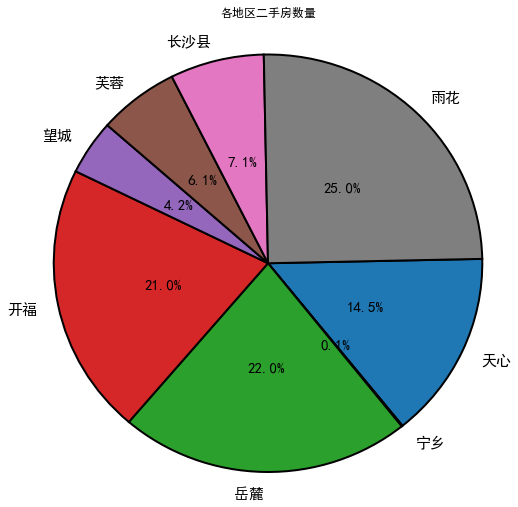

In [50]:
plt.figure(figsize=(8,8))
plt.pie(x=group1.size().values,labels=group1.size().index,autopct='%1.1f%%',pctdistance=0.5,labeldistance=1.1,\
        startangle=1.2,radius=1.2,counterclock=False,wedgeprops=\
        {'linewidth':2,'edgecolor':'black'},textprops={'fontsize':15,'color':'black'})
plt.title('各地区二手房数量',pad=30)
plt.show()

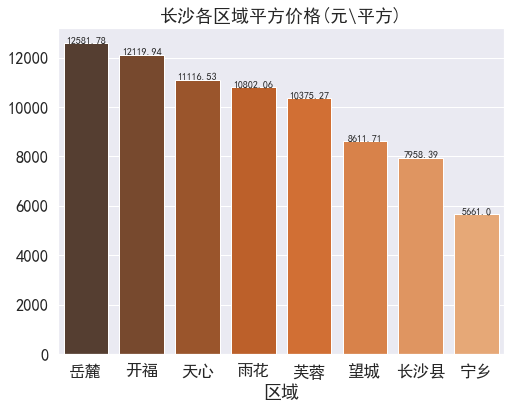

In [504]:
#房屋均价
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(group1.mean().iloc[:,1].sort_values(ascending=False).index
        ,group1.mean().iloc[:,1].sort_values(ascending=False).values,palette='Oranges_d')
plt.title('长沙各区域平方价格(元\平方)')
for x,y in enumerate(group1.mean().iloc[:,1].sort_values(ascending=False).values):
    plt.text(x,y,'%s'%round(y,2),ha='center',fontsize=10)
plt.show()

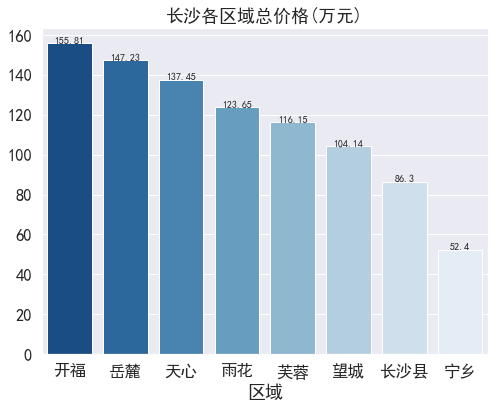

In [505]:
#房屋总价
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(group1.mean().iloc[:,2].sort_values(ascending=False).index
        ,group1.mean().iloc[:,2].sort_values(ascending=False).values,palette='Blues_r')
plt.title('长沙各区域总价格(万元)')
for x,y in enumerate(group1.mean().iloc[:,2].sort_values(ascending=False).values):
    plt.text(x,y,'%s'%round(y,2),ha='center',fontsize=10)
plt.show()

In [509]:
#户型与房均价关系
group2=h1.groupby('房屋户型')

### 建模预测各特征房价

In [507]:
h1.head(10)

,小区名,区域,地址,中心,房屋户型,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元),楼层数量
0,星城国际,长沙县,泉塘,二至三环,3室2厅1厨2卫,有,中楼层,93.24,南,7621,81.80,11
1,北辰三角洲奥城E3区,开福,北辰三角洲,二环内,4室1厅1厨2卫,有,低楼层,120.00,东南,19183,262.80,45
2,佳园星城,雨花,井湾子,二至三环,3室2厅1厨2卫,无,低楼层,90.00,南,6854,68.00,7
3,香巴圣地,雨花,左家塘,二至三环,2室2厅1厨1卫,有,高楼层,79.85,南,8981,84.20,10
4,梅溪湖壹号,岳麓,梅溪湖南岸,二至三环,3室1厅1厨1卫,有,低楼层,97.90,南,15016,147.00,26
5,君临国际,天心,五一广场,二环内,3室2厅1厨1卫,有,高楼层,91.10,南,15664,178.00,29
6,保利国际广场,天心,书院路,二环内,3室2厅1厨2卫,有,高楼层,108.27,南,18727,255.00,36
7,恒达时代花园,雨花,东塘,二至三环,3室2厅1厨2卫,有,高楼层,139.70,南 北,9449,132.00,9
8,凯通国际城,芙蓉,火车站,二环内,3室1厅1厨1卫,有,低楼层,83.14,南,10931,90.88,32
9,五矿万境水岸二期,雨花,喜盈门,二至三环,3室2厅1厨1卫,有,中楼层,104.00,南,14712,153.00,33


In [514]:
h3=h1.copy()

In [556]:
number1=[]
n_n=h3.iloc[:,4].copy()
for i,j in enumerate(['室','厅','厨','卫']):
    number2=[]
    for n,m in n_n.str.split(j): 
        number1.append(n)
        number2.append(m)
    n_n=pd.Series(number2)     

In [557]:
len(number1)

10376

In [570]:
h3=pd.concat([h3,pd.DataFrame(number1[:2594]),pd.DataFrame(number1[2594:5188]),pd.DataFrame(number1[5188:7782]),pd.DataFrame(number1[7782:10376])],axis=1)

In [576]:
h3.drop('房屋户型',axis=1,inplace=True)

In [580]:
h3.columns=[       '小区名',         '区域',         '地址',         '中心',       '有无电梯',
               '楼层',         '面积',         '朝向', '平方价格(元\平方)',   '房屋总价(万元)',
             '楼层数量',            '室',            '厅',            '厨',            '卫']

In [581]:
h3.head()

,小区名,区域,地址,中心,有无电梯,楼层,面积,朝向,平方价格(元\平方),房屋总价(万元),楼层数量,室,厅,厨,卫
0,星城国际,长沙县,泉塘,二至三环,有,中楼层,93.24,南,7621,81.8,11,3,2,1,2
1,北辰三角洲奥城E3区,开福,北辰三角洲,二环内,有,低楼层,120.00,东南,19183,262.8,45,4,1,1,2
2,佳园星城,雨花,井湾子,二至三环,无,低楼层,90.00,南,6854,68.0,7,3,2,1,2
3,香巴圣地,雨花,左家塘,二至三环,有,高楼层,79.85,南,8981,84.2,10,2,2,1,1
4,梅溪湖壹号,岳麓,梅溪湖南岸,二至三环,有,低楼层,97.90,南,15016,147.0,26,3,1,1,1


In [587]:
Once=OneHotEncoder()
Once=Once.fit(h3.iloc[:,[1,2,3,4,5,7]])
Once_=Once.transform(h3.iloc[:,[1,2,3,4,5,7]])

In [613]:
h4=pd.concat([h3.drop(['小区名','区域','地址','中心','有无电梯','楼层','朝向','平方价格(元\平方)','房屋总价(万元)'],axis=1),pd.DataFrame(Once_.toarray())],axis=1)

In [614]:
h4.head()

,面积,楼层数量,室,厅,厨,卫,0,1,2,3,...,126,127,128,129,130,131,132,133,134,135
0,93.24,11,3,2,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120.00,45,4,1,1,2,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90.00,7,3,2,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79.85,10,2,2,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,97.90,26,3,1,1,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [635]:
label_=h3.iloc[:,9].values

In [640]:
pca=PCA(n_components=0.9999,svd_solver='full')
pca=pca.fit(h4)
pca.explained_variance_ratio_.sum()

0.9999032302592802

In [618]:
pca_=pca.transform(h4)

In [651]:
cross_val_score(KN(),h4,label_,cv=10).mean()

0.5412724920293617

In [652]:
cross_val_score(KN(),pca_,label_,cv=10).mean()

0.5304854743603429

In [647]:
cross_val_score(RFR(),pca_,label_,cv=10).mean()

0.6448068950714704

In [653]:
cross_val_score(RFR(),h4,label_,cv=10).mean()

0.7180396155509925

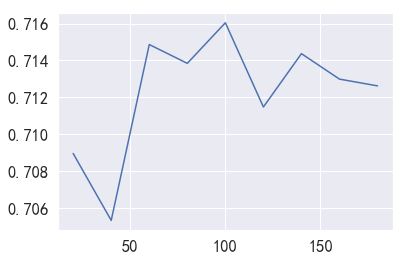

In [654]:
RFR_control=[]
for i in range(20,200,20):
    RFR_control.append(cross_val_score(RFR(n_estimators=i),h4,label_,cv=10).mean())
plt.plot(range(20,200,20),RFR_control)
plt.show()

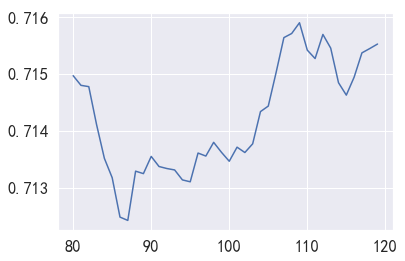

In [673]:
RFR_control=[]
for i in range(80,120,1):
    RFR_control.append(cross_val_score(RFR(n_estimators=i,random_state=0),h4,label_,cv=10).mean())
plt.plot(range(80,120,1),RFR_control)
plt.show()

In [674]:
RFR_control.index(max(RFR_control))

29

In [676]:
max(RFR_control)

0.7159004655963971

In [678]:
rfr=RFR(n_estimators=109,random_state=0)
cross_val_score(RFR(),h4,label_,cv=10).mean()

0.7159254534292465

In [683]:
parameters={'max_depth':[*range(5,50,5)]}#
rfc=RFR(n_estimators=109,random_state=0)
GS=GridSearchCV(rfr,parameters,cv=10)
GS.fit(h4,label_)
GS.best_score_

0.7166440962607928

In [684]:
GS.best_params_

{'max_depth': 35}

In [685]:
rfr=RFR(n_estimators=109,random_state=0,max_depth=35)
cross_val_score(RFR(),h4,label_,cv=10).mean()

0.7136808791364884